# Задача 1.
Построить по имеющимся данным интервальный вариационный ряд с равными интервалами, начертить гистограмму, найти среднее значение, дисперсию, коэффициент вариации и размах вариации:



*Данные в файле data.txt


In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [124]:
def variance(aver, data):
    deviations = [(x - aver) ** 2 for x in data]

    return sum(deviations) / len(data)

In [125]:
with open('./data.txt', encoding='utf-8') as file:
    sent = file.read()

sent = sent.replace(',', '.')
sent = sent.replace('  ', ',')
sent = sent[:-2]

data = sent.split(',')
data = sorted(list(map(float, data)))

print(f'Type of data: {type(data)}\nData: {data[:5]}\nSize: {len(data)}')

Type of data: <class 'list'>
Data: [0.46, 0.52, 0.57, 0.61, 0.62]
Size: 52


In [126]:
split_data = np.array_split(data, 7)

In [127]:
var_raw = {}
maxes = [i[-1] for i in split_data]
mins = [i[0] for i in split_data]

for dist in split_data:
    var_raw[f'{min(dist)} - {max(dist)}'] = 0

for i in data:
    for idx_max_min, max_ in enumerate(maxes):
        min_ = mins[idx_max_min]
        if i >= min_ and i <= max_:
            #берем элемент словаря по индексу
            var_raw[f'{list(var_raw.keys())[idx_max_min]}'] += 1
            break


for key, value in var_raw.items():
    print(key, '|', value)
    print('-------------')

0.46 - 0.71 | 9
-------------
0.71 - 0.78 | 7
-------------
0.81 - 0.89 | 9
-------------
0.89 - 0.94 | 6
-------------
0.96 - 1.02 | 8
-------------
1.02 - 1.08 | 6
-------------
1.09 - 1.33 | 7
-------------


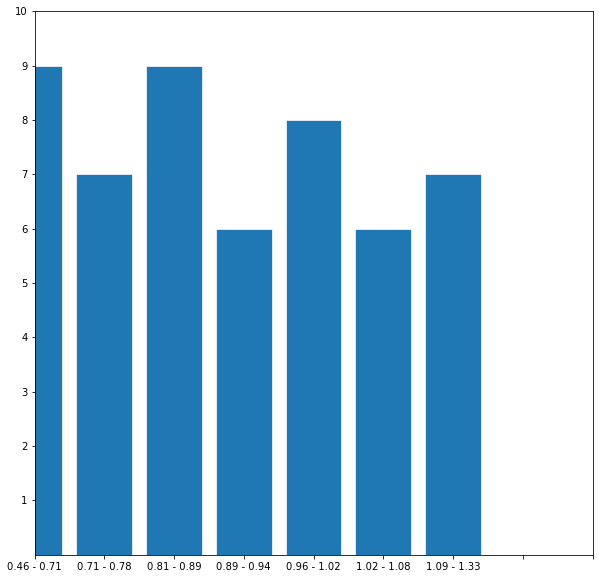

In [128]:
# plot
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
ax.bar(var_raw.keys(), var_raw.values(), width=0.8, edgecolor="white", linewidth=0.7)
ax.set(xlim=(0, 8), xticks=np.arange(0, 9),
       ylim=(0, 8), yticks=np.arange(1, 11))


plt.show()

In [129]:
average = sum(data) / len(data)
var = variance(average, data)
cv = (var / average) * 100

print(f'Среднее значение: {average}')
print(f'Дисперсия: {var}')
print(f'Коэффициент вариации: {cv}%')
print(f'Размах вариации: {max(data) - min(data)}')

Среднее значение: 0.8963461538461538
Дисперсия: 0.034969341715976335
Коэффициент вариации: 3.9013211096991407%
Размах вариации: 0.8700000000000001


# Задача 2.
Постройте кумулятивный ряд, начертите кумулянту, найдите моду и медиану.

In [148]:
#кумулятивный ряд
data_2 = {
    '1.6-2.0': 3,
    '2.0-2.4': 5,
    '2.4-2.8': 7,
    '2.8-3.2': 10,
    '3.2-3.6': 6,
    '3.6-4.0': 3
}

data_cum = {}
data_values = list(data_2.values())

data_cum_value = np.cumsum(data_values)
iter = 0

for key in data_2.keys():
    data_cum[f'{key}'] = data_cum_value[iter]
    iter += 1


for key, value in data_cum.items():
    print(key, '|', value)
    print('-------------')

1.6-2.0 | 3
-------------
2.0-2.4 | 8
-------------
2.4-2.8 | 15
-------------
2.8-3.2 | 25
-------------
3.2-3.6 | 31
-------------
3.6-4.0 | 34
-------------


График кумулянты, мода и медиана

Мода: ModeResult(mode=array([3]), count=array([2]))
Медиана: 5.5


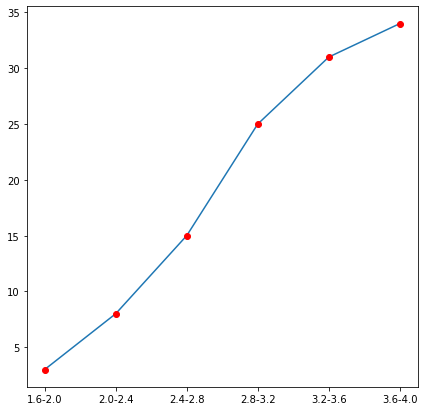

In [149]:
plt.figure(figsize=(7, 7))
plt.plot(data_cum.keys(), data_cum.values())
plt.plot(data_cum.keys(), data_cum.values(),'ro')


mode = stats.mode(data_values)
median = np.median(data_values)

print(f'Мода: {mode}')
print(f'Медиана: {median}')

# plt.axvline(median / 100 * 6, color='g', label='median')
# plt.axvline(mode / 100 * 6, color='r', label='mode')
# plt.axvline(x=0.22058956)

plt.show()

# Задание 3.
Две группы рабочих изготавливают одинаковую продукцию. Для каждой из этих групп даны ряды распределения рабочих по числу изготавливаемых за смену деталей (см. таблицу). Вычислить для каждой группы выборочные характеристики: среднюю, дисперсию, среднее квадратическое отклонение, коэффициент вариации. Дать характеристику среднего уровня производительности труда в группах.

In [150]:
df = pd.read_csv('./file.csv')
df

,ngroup,details,mans
0,1,15,2
1,1,18,1
2,1,20,7
3,2,15,2
4,2,18,2
5,2,20,10


In [153]:
#Целевая переменная - details

print('Среднее значение:')
print(df.groupby('ngroup').mean(), '\n')
print('Дисперсия')
print(df.groupby('ngroup').var(), '\n')
print('СКО')
print(df.groupby('ngroup').std(), '\n')
print('Коэффициент вариации')
print(df.groupby('ngroup').std() /
       df.groupby('ngroup').mean())

Среднее значение:
          details      mans
ngroup                     
1       17.666667  3.333333
2       17.666667  4.666667 

Дисперсия
         details       mans
ngroup                     
1       6.333333  10.333333
2       6.333333  21.333333 

СКО
         details      mans
ngroup                    
1       2.516611  3.214550
2       2.516611  4.618802 

Коэффициент вариации
        details      mans
ngroup                   
1       0.14245  0.964365
2       0.14245  0.989743


In [154]:
#расчет среднего уровня производительности труда работника
w = df.groupby('ngroup').sum()
w = w['details'] / w['mans']

print('Средний уровень производительности рабочих')
print(w)

Средний уровень производительности рабочих
ngroup
1    5.300000
2    3.785714
dtype: float64


# Задача 4
https://studopedia.ru/5_84510_tipovaya-zadacha--.html

# Задача 6
https://studfile.net/preview/2115367/page:24/

# Задача 7
В опытном хозяйстве на протяжении 32 месяцев отмечали расходы на механизацию работ (X , тыс. р.) и полученные привесы всего скота (Y, ц). Установили, что имеет место прямая корреляционная зависимость между ними: r= 0,8. Проверить значимость этой связи при = 0,05. Написать уравнение линейной регрессии и объяснить его, если известно, что выборочные средние квадратические отклонения соответственно равны: s=3,2 тыс. р., s= 8 ц, а средние значения:  = 8 тыс. p.,  = 40 ц.

Решение:

H0 - линейная зависимость незначимая p = 0

H - линейная зависимость значимая p != 0

In [161]:
#mex - т.р  scot - ц
alpha = 0.05
n = 32
r = 0.8
std_mex = 3.2
std_scot = 8
mean_mex = 8
mean_scot = 40


k = n - 2 #т.к. оцениваем только один критерий - коэфиициент корреляции
krit = 2.04 #по таблице критические точки распределения стьюдента

T = (r * (k - 2) ** 0.5) / (1 - r) ** 0.5
if (T > -krit) and T < (krit):
    print(f'Принимаем гипотезу H0, т.к. {-krit} < {T} < {krit}')
else:
    print(f'Принимаем гипотезу H1, т.к. {-krit} < {T} < {krit} - ложное утверждение')

Принимаем гипотезу H1, т.к. -2.04 < 9.465727652959387 < 2.04 - ложное утверждение


# Построим уравнение регресии

In [163]:
b1 = (std_scot / std_mex) * r   #slope
b0 = mean_scot - b1 * mean_mex  #intercept
print(b1, b0)

2.0 24.0


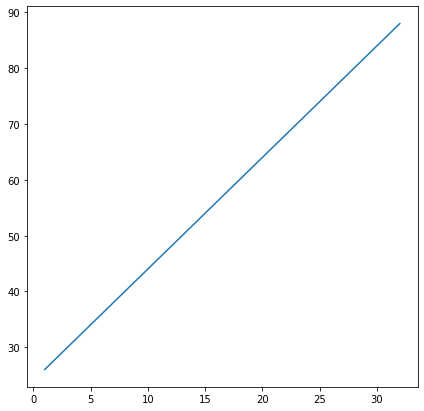

In [177]:
x = np.linspace(1, 32)
y = b0 + x * b1


plt.figure(figsize=(7, 7))
plt.plot(x,  y)